In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tqdm import tqdm

# Random Forest Classifier

  0%|          | 0/81 [00:00<?, ?it/s]

100%|██████████| 27/27 [02:42<00:00,  6.02s/it]


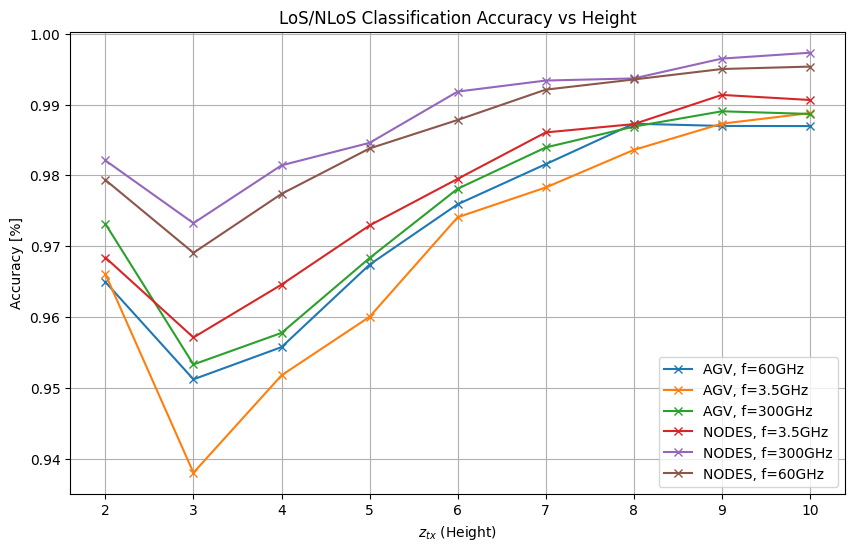

In [3]:
dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}
acc = list()
for subfolder in subfolders:
    for key, (X_list, y_list) in tqdm(data_by_subfolder[subfolder].items()):
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        acc.append(accuracy)
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# acc
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, accuracies, marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

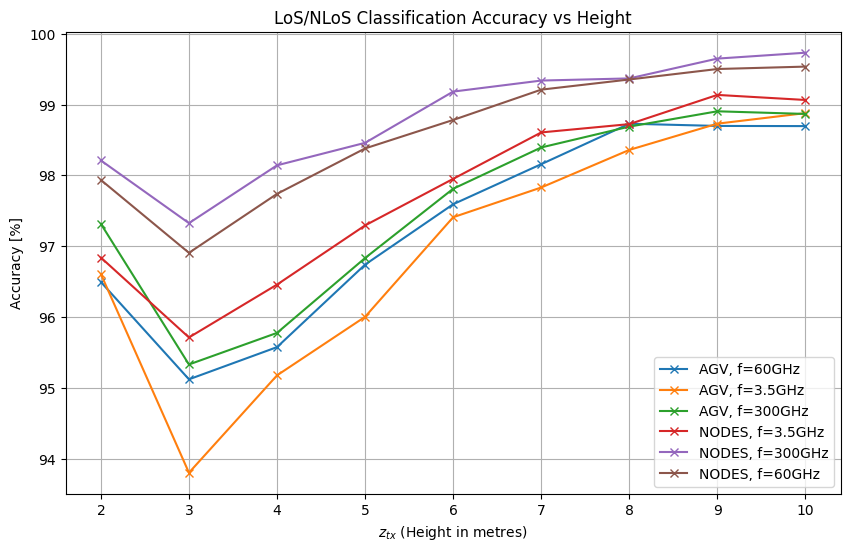

In [4]:
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [5]:
# Mean Accuracies for RF
np.mean(accuracies), np.std(accuracies)

(np.float64(0.9859414563445567), np.float64(0.008670572404520138))

# K-Nearest Neighbors Classifier

100%|██████████| 27/27 [00:31<00:00,  1.19s/it]


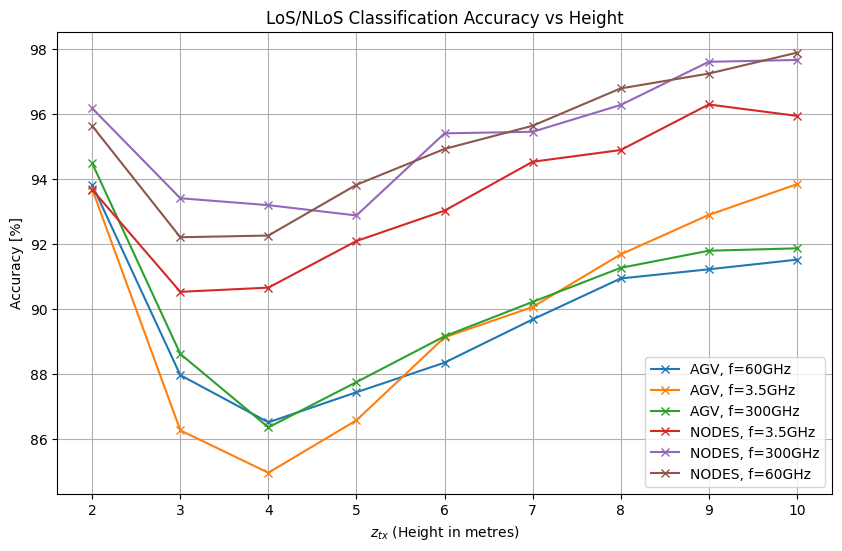

In [6]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, (X_list, y_list) in tqdm(data_by_subfolder[subfolder].items()):
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = KNeighborsClassifier(n_neighbors=5)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [7]:
# KNN
np.mean(accuracies), np.std(accuracies)

(np.float64(0.9516037470004846), np.float64(0.019377919633970193))

# AdaBoost Classifier

100%|██████████| 2/2 [01:36<00:00, 48.36s/it]


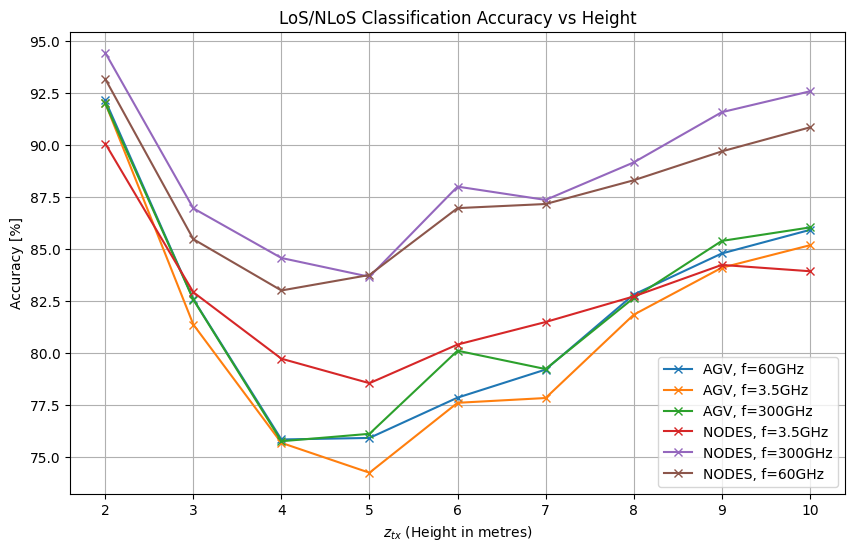

In [8]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in tqdm(subfolders):
    for key, (X_list, y_list) in data_by_subfolder[subfolder].items():
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=50,
        random_state=42
        )
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [9]:
# Adaboost
np.mean(accuracies), np.std(accuracies)

(np.float64(0.8758741592201646), np.float64(0.031134049464728968))

# Decision Tree Classifier

100%|██████████| 2/2 [00:13<00:00,  6.54s/it]


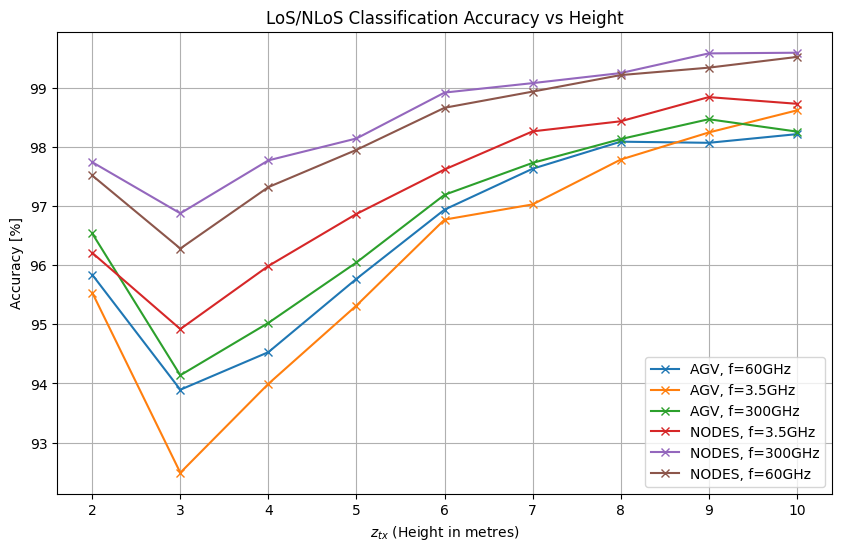

In [10]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in tqdm(subfolders):
    for key, (X_list, y_list) in data_by_subfolder[subfolder].items():
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = DecisionTreeClassifier(random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [11]:
# Decision Trees
np.mean(accuracies), np.std(accuracies)

(np.float64(0.9830462863234821), np.float64(0.010388830134440566))

# Gradient Boosting Decision Tree Classifier

100%|██████████| 2/2 [06:32<00:00, 196.04s/it]


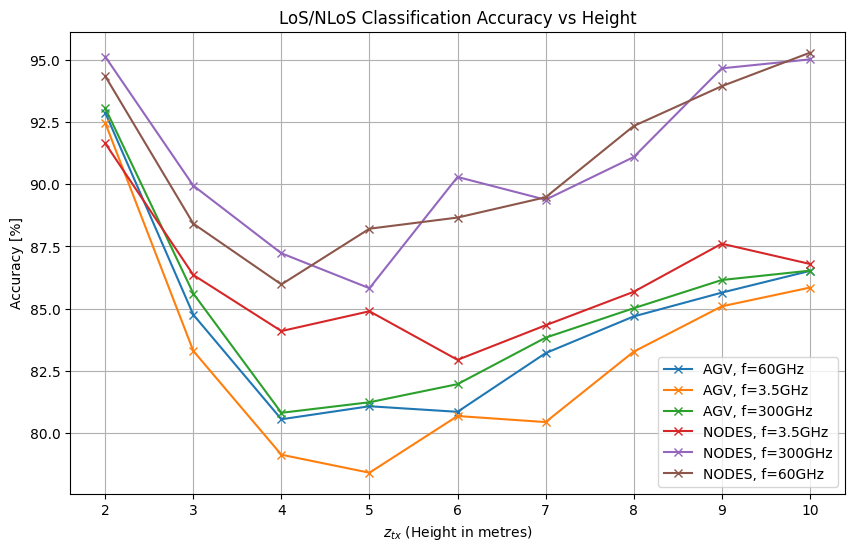

In [12]:
from sklearn.ensemble import GradientBoostingClassifier
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        # print(parts)
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in tqdm(subfolders):
    for key, (X_list, y_list) in data_by_subfolder[subfolder].items():
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Random Forest model
        model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# We'll loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i*100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height")
plt.legend()
plt.grid()
plt.show()

In [13]:
# Gradient Boosting Decision Trees
np.mean(accuracies),np.std(accuracies)

(np.float64(0.9073349740018446), np.float64(0.031038596611157383))

# NN-MLP Classifier

Training models for nodes: 100%|██████████| 27/27 [02:33<00:00,  5.70s/it]


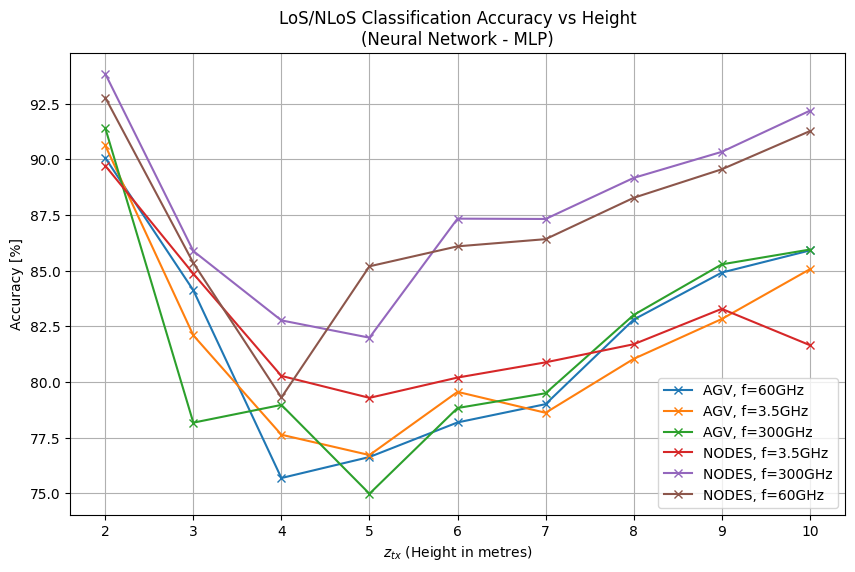

In [14]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm

dataset_path = "dataset"
subfolders = ["agv", "nodes"]  # Two categories

# We'll store data separately for each subfolder, frequency, and height
data_by_subfolder = {sub: {} for sub in subfolders}

# Collect data by subfolder, frequency, and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files, desc=f"Processing {subfolder}"):
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        # parts[5] contains frequency info (e.g., '3.5GHz')
        freq = parts[5]        
        # parts[8] contains height info (e.g., '2.txt'); remove extension
        h_tx = int(parts[8].split('.')[0])
        
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Labels
        
        key = (freq, h_tx)
        if key not in data_by_subfolder[subfolder]:
            data_by_subfolder[subfolder][key] = ([], [])
        data_by_subfolder[subfolder][key][0].append(X)
        data_by_subfolder[subfolder][key][1].append(y)

# Train models and collect results by (subfolder, frequency)
results = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, (X_list, y_list) in tqdm(data_by_subfolder[subfolder].items(), desc=f"Training models for {subfolder}"):
        freq, h_tx = key
        
        # Concatenate data from all MD values for this combination
        X = pd.concat(X_list, ignore_index=True)
        y = pd.concat(y_list, ignore_index=True)
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Neural Network (MLP) model
        model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42)
        model.fit(X_train, y_train)
        
        # Evaluate accuracy
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        
        # Store results by subfolder and frequency
        if freq not in results[subfolder]:
            results[subfolder][freq] = []
        results[subfolder][freq].append((h_tx, accuracy))

# Plot Accuracy vs. Height for each combination on a single graph
plt.figure(figsize=(10, 6))
# Loop over each subfolder and frequency, sorting the values by height before plotting
for subfolder in subfolders:
    for freq, values in results[subfolder].items():
        # Sort by height
        values.sort(key=lambda x: x[0])
        heights, accuracies = zip(*values)
        plt.plot(heights, [i * 100 for i in accuracies], marker='x', linestyle='-', 
                 label=f"{subfolder.upper()}, f={freq}")
        
plt.xlabel("$z_{tx}$ (Height in metres)")
plt.ylabel("Accuracy [%]")
plt.title("LoS/NLoS Classification Accuracy vs Height\n(Neural Network - MLP)")
plt.legend()
plt.grid()
plt.show()

In [15]:
# NN-MLP
np.mean(accuracies), np.std(accuracies)

(np.float64(0.8713774654956707), np.float64(0.03740236362017731))

# Dataset Correlation Matrix

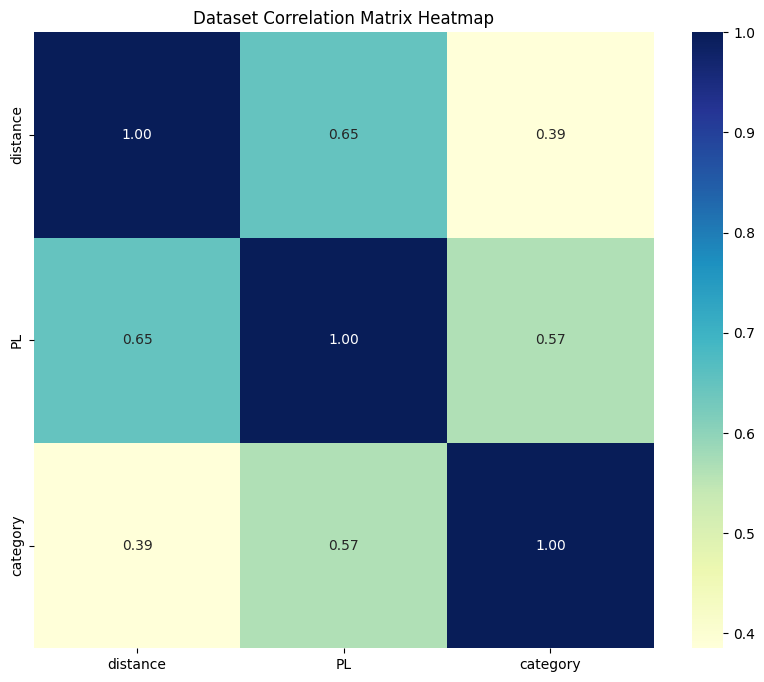

In [16]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
import seaborn as sns

dataset_path = "dataset"
subfolders = ["agv",'nodes']  # Two categories
data_list = []

# Collect data by frequency and height
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in files:
        # Extract metadata from filename
        filename = os.path.basename(file)
        parts = filename.split("_")
        freq = parts[5]        # Extract frequency
        h_tx = int(parts[8].split('.')[0])   # Extract height
        
        # Read dataset
        df = pd.read_csv(file)
        X = df[["distance", "PL"]]  # Features
        y = df["category"]  # Labels
        data_list.append(df)

all_data = pd.concat(data_list, ignore_index=True)

corr_matrix = all_data.corr()
# corr_matrix = (corr_matrix+1)
matrix = []
for row in corr_matrix.values:
    new_row = []
    for val in row:
        if val < -0.4:
            new_row.append((val + 1))
        else:
            new_row.append((val+1)/2)
    matrix.append(new_row)
transformed_corr = pd.DataFrame(matrix, index=corr_matrix.index, columns=corr_matrix.columns)
# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(transformed_corr, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Dataset Correlation Matrix Heatmap")
plt.show()

# Regression

## Path Loss Exponent Estimation

100%|██████████| 81/81 [00:00<00:00, 109.88it/s]


Training Decision Tree classifiers...


100%|██████████| 81/81 [00:01<00:00, 73.98it/s]


Calculating Path Loss Exponent...


100%|██████████| 81/81 [01:13<00:00,  1.10it/s]


Creating plots...


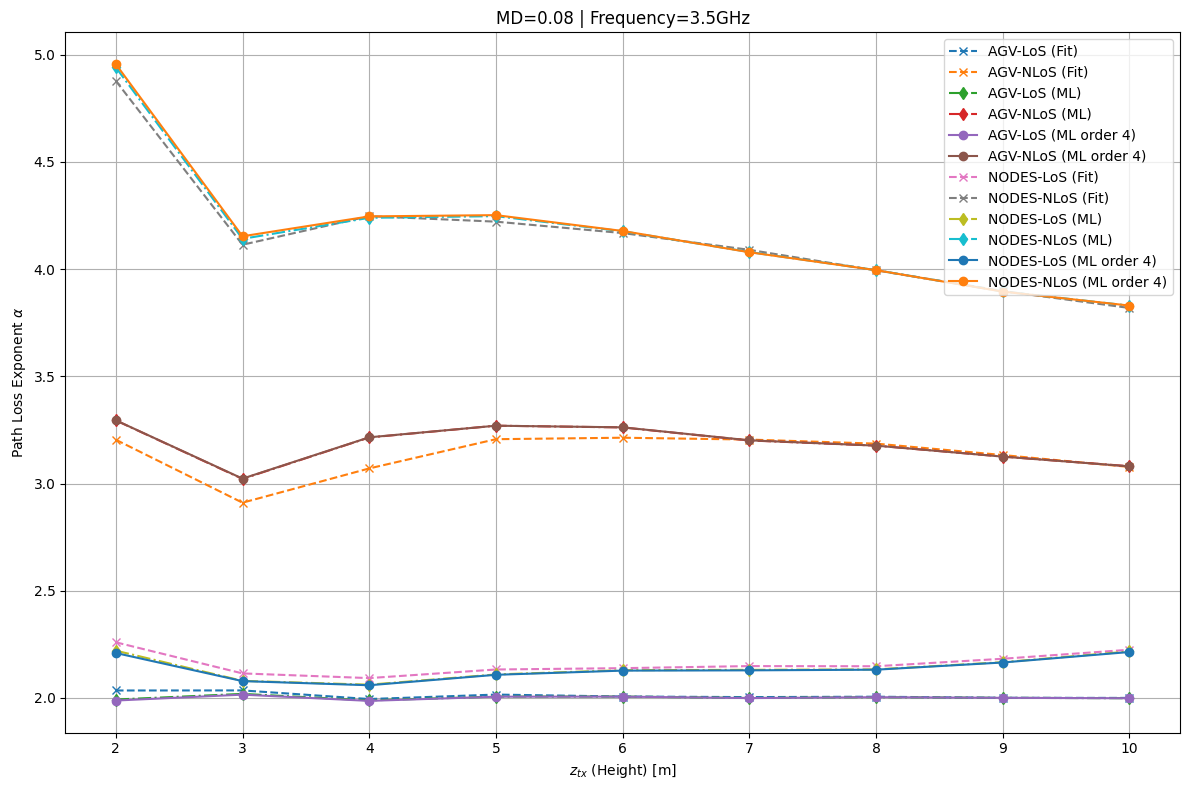

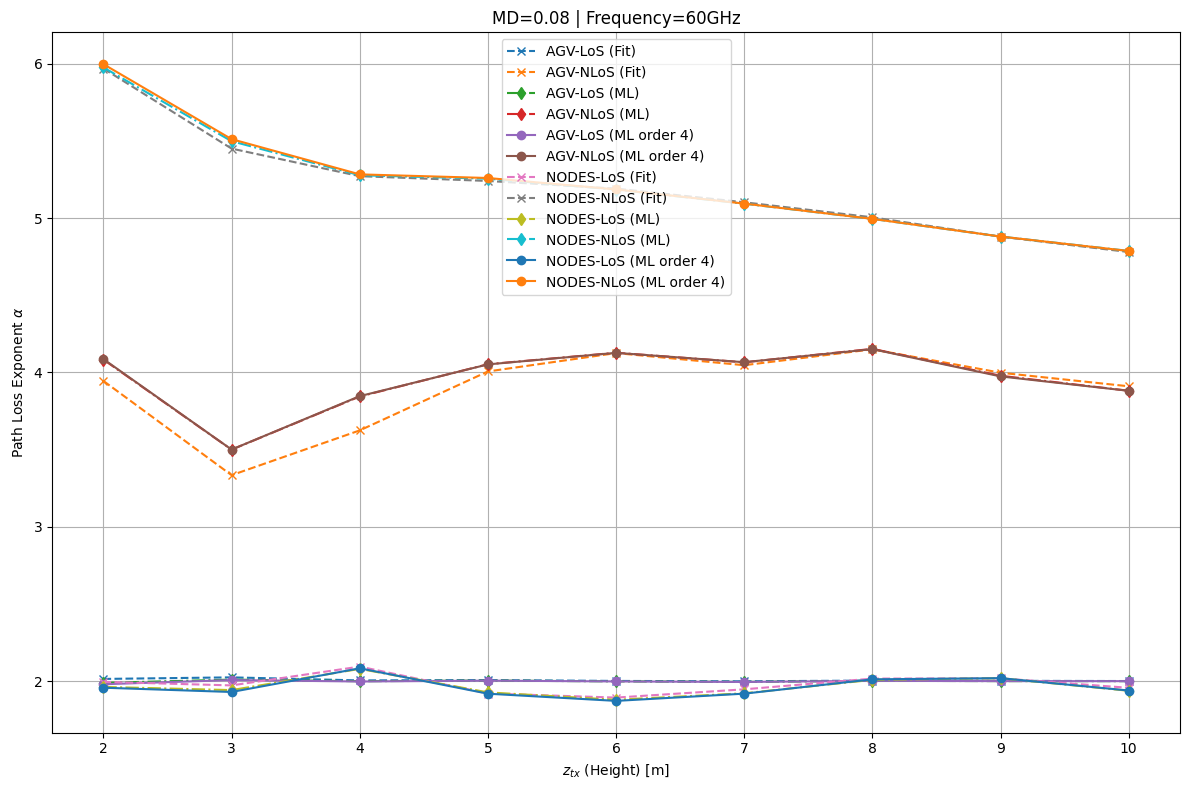

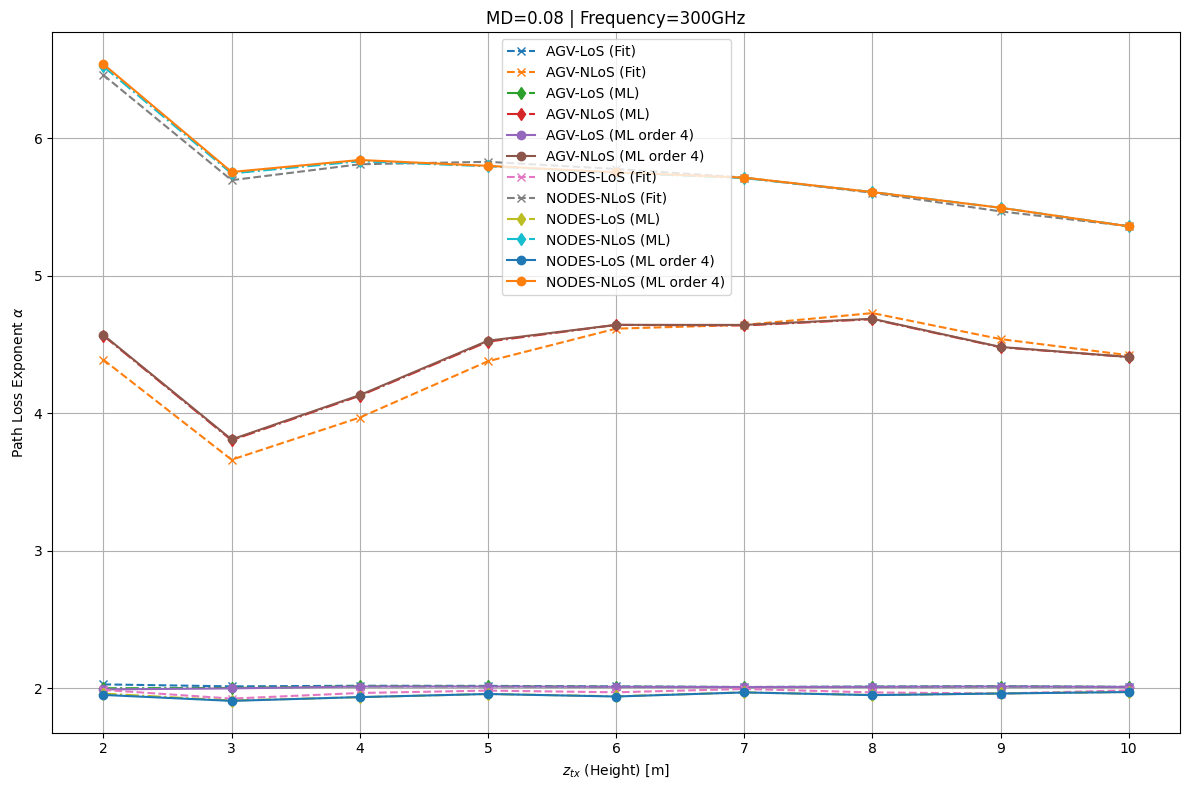

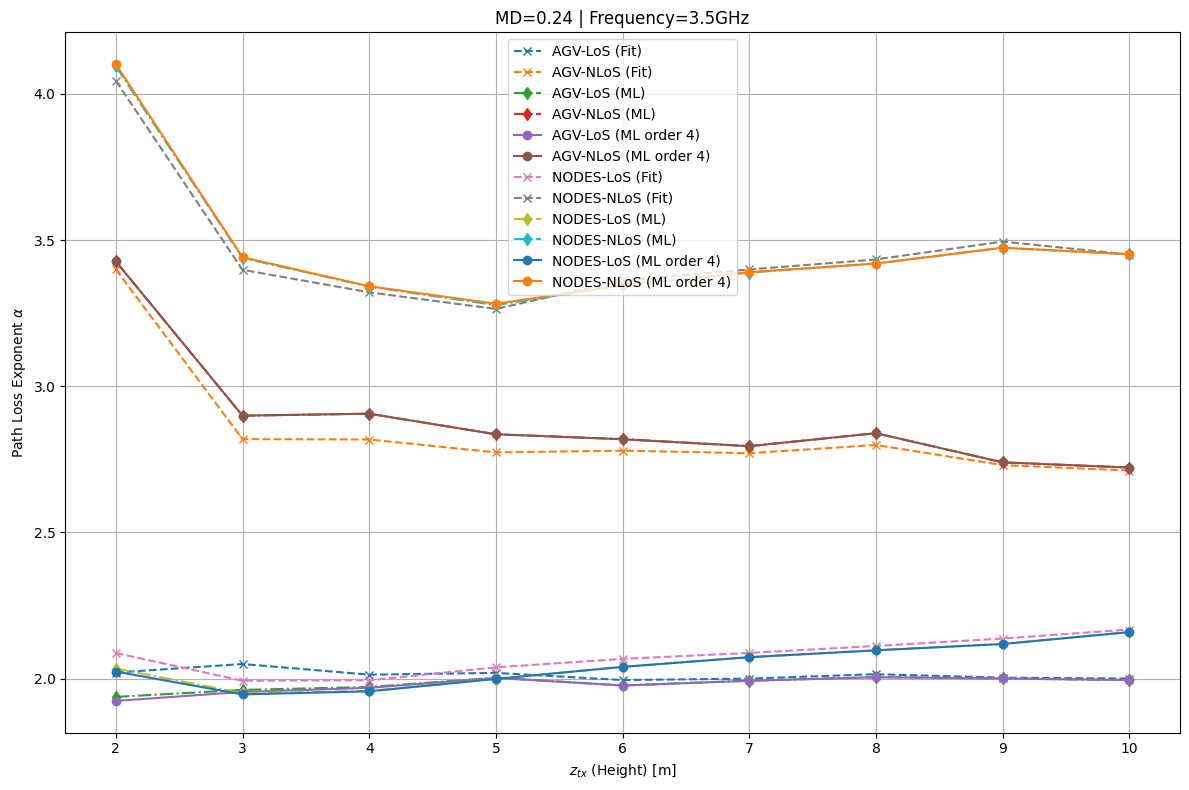

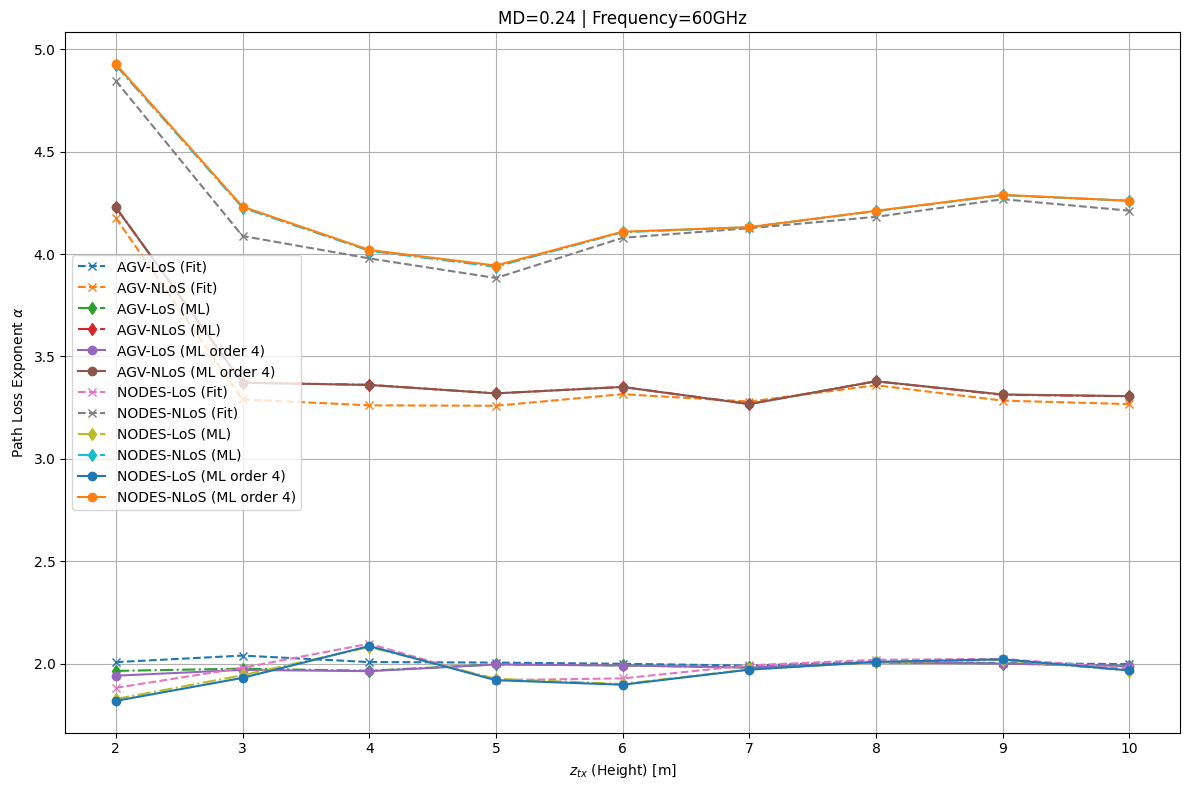

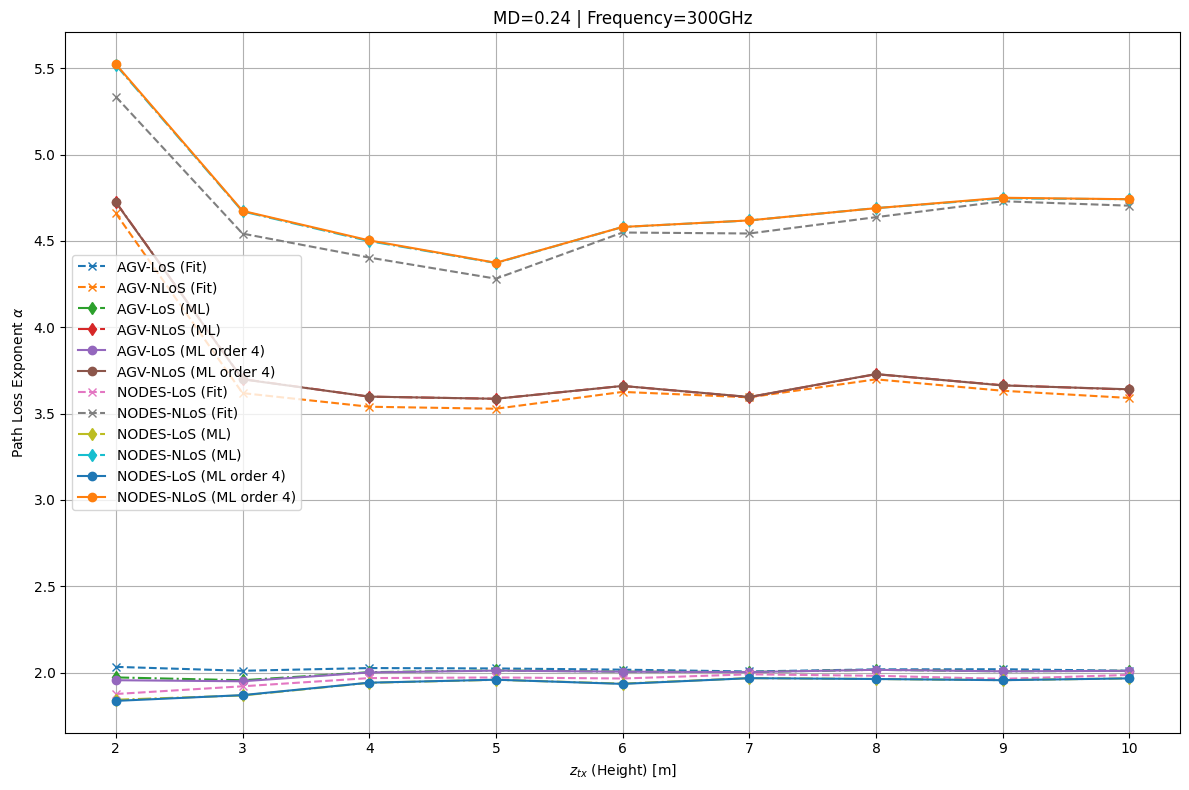

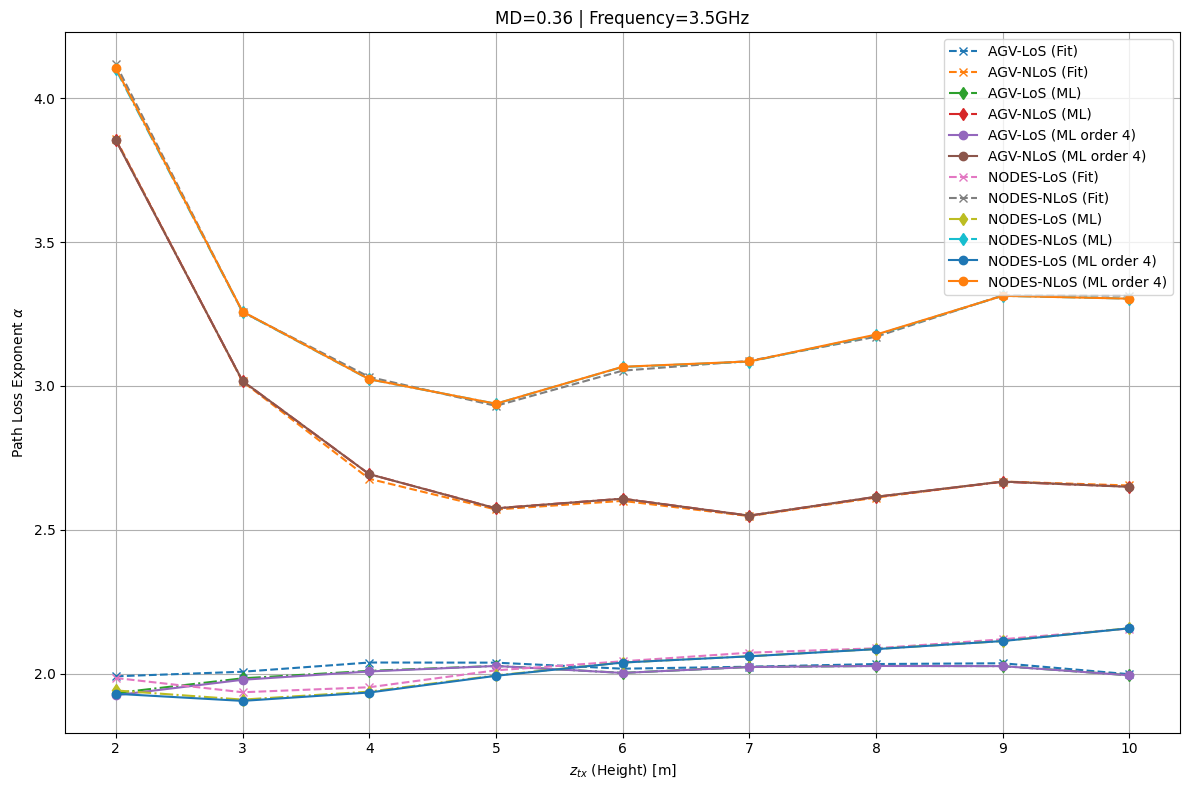

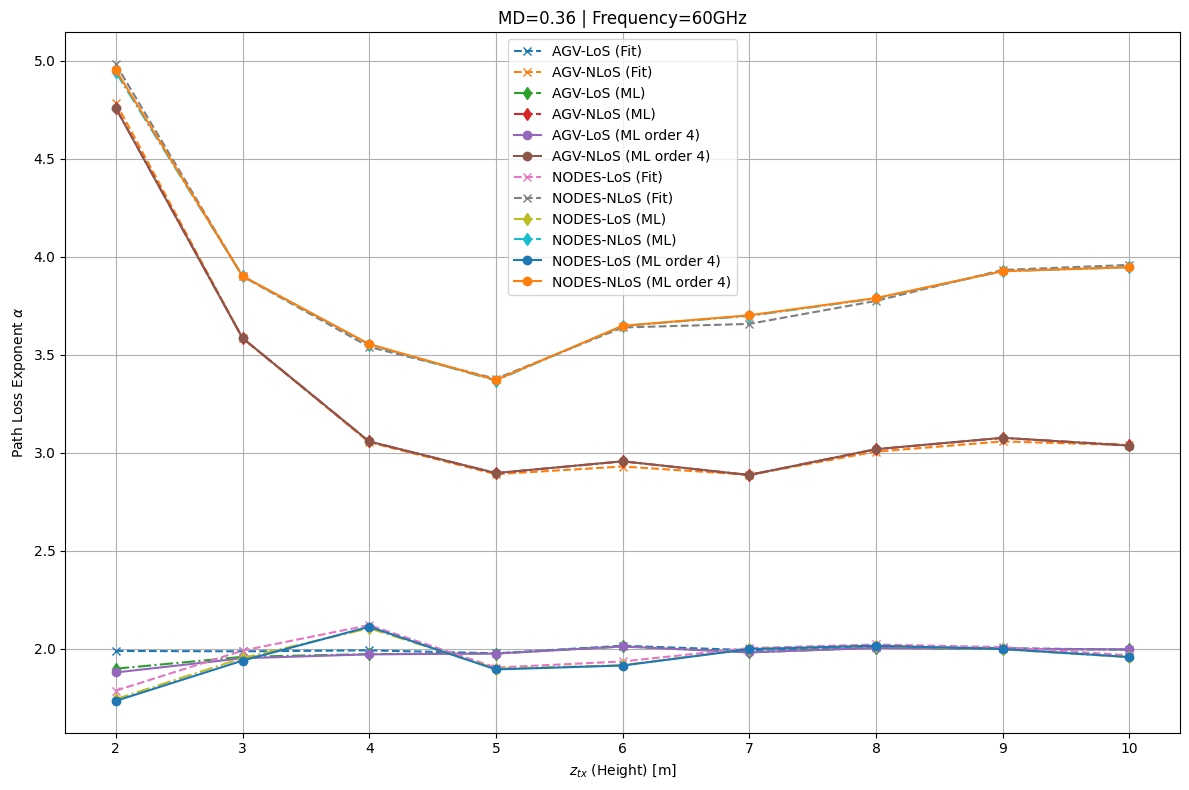

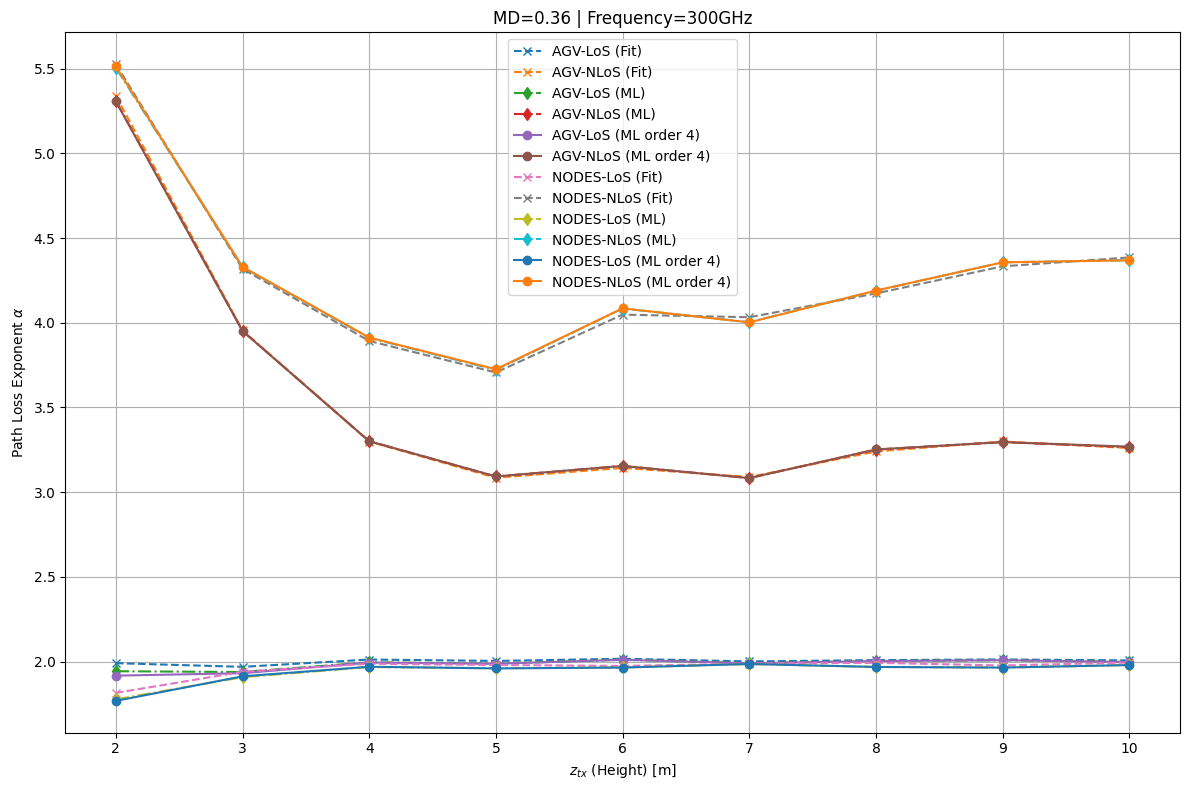

Analysis complete!


In [6]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as RandomForestClassifier 
from sklearn.metrics import accuracy_score
from tqdm import tqdm

dataset_path = "dataset"
subfolders = ["agv", "nodes"]

# Store raw data by subfolder, MD, frequency, height
raw_data = {sub: {} for sub in subfolders}

# Step 1: Collect all raw data first
print("Collecting raw data...")
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        filename = os.path.basename(file)
        parts = filename.split("_")
        md = parts[3]
        freq = parts[5]
        h_tx = int(parts[8].split('.')[0])

        df = pd.read_csv(file)
        
        # Store data in our structure
        key = (md, freq, h_tx)
        if key not in raw_data[subfolder]:
            raw_data[subfolder][key] = df

# Step 2: Train Decision Tree classifiers for each combination
print("Training Decision Tree classifiers...")
ml_classifiers = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, df in tqdm(raw_data[subfolder].items()):
        md, freq, h_tx = key
        
        # Prepare data for classification
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Original labels
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Decision Tree model
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        
        # Store the trained model
        if md not in ml_classifiers[subfolder]:
            ml_classifiers[subfolder][md] = {}
        if freq not in ml_classifiers[subfolder][md]:
            ml_classifiers[subfolder][md][freq] = {}
        
        ml_classifiers[subfolder][md][freq][h_tx] = model

# Step 3: Calculate Path Loss Exponent for both original and ML-predicted labels
print("Calculating Path Loss Exponent...")
# Results structure: subfolder -> md -> freq -> {original/ml} -> link_label -> [(height, alpha)]
results = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, df in tqdm(raw_data[subfolder].items()):
        md, freq, h_tx = key
        
        # Get ML predictions for this dataset
        X = df[["distance", "PL"]]
        original_labels = df["category"]
        
        # Use the corresponding trained model to predict labels
        if (md in ml_classifiers[subfolder] and 
            freq in ml_classifiers[subfolder][md] and 
            h_tx in ml_classifiers[subfolder][md][freq]):
            
            model = ml_classifiers[subfolder][md][freq][h_tx]
            ml_predicted_labels = model.predict(X)
        else:
            continue  # Skip if no model is available
        
        # Calculate wavelength and reference path loss
        f = float(freq[:-3]) * 1e9
        wavelength = 3e8 / f
        c = 20 * np.log10(4 * np.pi / wavelength)
        
        # Process both original and ML-predicted labels
        for label_type, labels in [("original", original_labels), ("ml", ml_predicted_labels) , ('order4', ml_predicted_labels)]:
            # Create a new dataframe with the labels
            df_with_labels = df.copy()
            df_with_labels["labels"] = labels
            
            # Process LoS and NLoS separately
            for link_value, link_label in [(1.0, 'LoS'), (0.0, 'NLoS')]:
                df_link = df_with_labels[df_with_labels["labels"] == link_value]
                
                if df_link.empty:
                    continue
                
                X_link = df_link[["distance"]]
                y_link = df_link["PL"]
                
                X_train, X_test, y_train, y_test = train_test_split(
                    X_link, y_link, test_size=0.4, random_state=42)
                
                # Polynomial regression to fit the path loss model
                if(label_type == 'order4'):
                    poly = PolynomialFeatures(degree=4)
                elif(label_type == 'ml'):    
                    poly = PolynomialFeatures(degree=2)
                else:
                    poly = PolynomialFeatures(degree=1)

                X_poly_train = poly.fit_transform(X_train)
                X_poly_test = poly.transform(X_test)
                X_poly = poly.fit_transform(X_link)
                model = LinearRegression()
                model.fit(X_poly_train, y_train)
                y_pred = model.predict(X_poly)
                alpha = (y_pred - c) / (10 * np.log10(X_link['distance']))
                mean_alpha = np.mean(alpha)

                
                # Store results
                if md not in results[subfolder]:
                    results[subfolder][md] = {}
                if freq not in results[subfolder][md]:
                    results[subfolder][md][freq] = {}
                if label_type not in results[subfolder][md][freq]:
                    results[subfolder][md][freq][label_type] = {}
                if link_label not in results[subfolder][md][freq][label_type]:
                    results[subfolder][md][freq][label_type][link_label] = []
                
                results[subfolder][md][freq][label_type][link_label].append((h_tx, mean_alpha))

# Step 4: Create 9 plots with both Fit and ML results
print("Creating plots...")
md_list = ['0.08', '0.24', '0.36']
freq_list = ['3.5GHz', '60GHz', '300GHz']

for md in md_list:
    for freq in freq_list:
        plt.figure(figsize=(12, 8))
        
        for subfolder in subfolders:
            if md not in results[subfolder] or freq not in results[subfolder][md]:
                continue
                
            # Plot original labels (Fit)
            if 'original' in results[subfolder][md][freq]:
                for link_label in ['LoS', 'NLoS']:
                    if link_label in results[subfolder][md][freq]['original']:
                        values = results[subfolder][md][freq]['original'][link_label]
                        values.sort(key=lambda x: x[0])
                        heights, alphas = zip(*values)
                        
                        plt.plot(heights, alphas, marker='x', linestyle='--', 
                                label=f"{subfolder.upper()}-{link_label} (Fit)")
            
            # Plot ML-predicted labels
            if 'ml' in results[subfolder][md][freq]:
                for link_label in ['LoS', 'NLoS']:
                    if link_label in results[subfolder][md][freq]['ml']:
                        values = results[subfolder][md][freq]['ml'][link_label]
                        values.sort(key=lambda x: x[0])
                        heights, alphas = zip(*values)
                        
                        plt.plot(heights, alphas, marker='d', linestyle='-.', 
                                label=f"{subfolder.upper()}-{link_label} (ML)")
                        

            if 'order4' in results[subfolder][md][freq]:
                for link_label in ['LoS', 'NLoS']:
                    if link_label in results[subfolder][md][freq]['order4']:
                        values = results[subfolder][md][freq]['order4'][link_label]
                        values.sort(key=lambda x: x[0])
                        heights, alphas = zip(*values)
                        
                        plt.plot(heights, alphas, marker='o', linestyle='-', 
                                label=f"{subfolder.upper()}-{link_label} (ML order 4)")

        
        plt.xlabel("$z_{tx}$ (Height) [m]")
        plt.ylabel("Path Loss Exponent $\\alpha$")
        plt.title(f"MD={md} | Frequency={freq}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        # plt.savefig(f"PL_exponent_MD{md}_{freq}.png")
        plt.show()

print("Analysis complete!")

## Shadowing Standard Deviation Estimation

100%|██████████| 81/81 [00:00<00:00, 86.28it/s] 


Training Decision Tree classifiers...


100%|██████████| 81/81 [00:01<00:00, 63.08it/s]


Calculating Path Loss Exponent...


100%|██████████| 81/81 [00:58<00:00,  1.39it/s]


Creating plots...


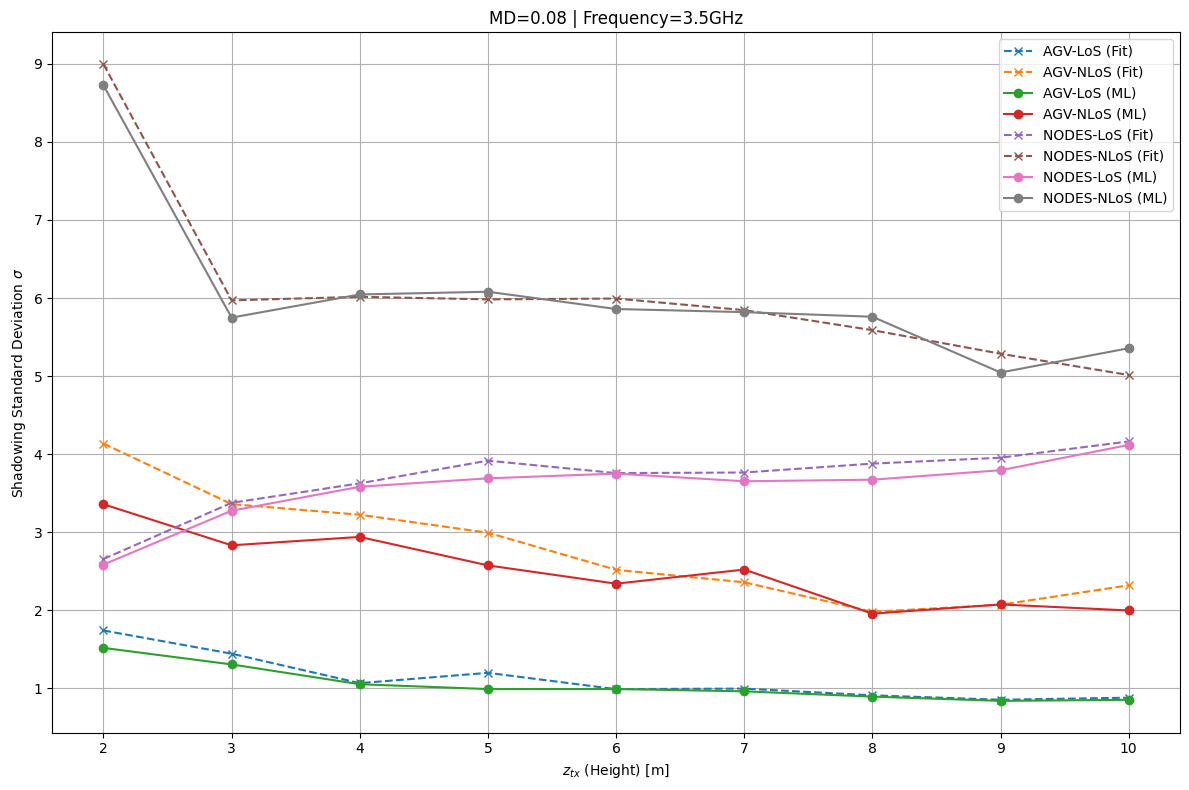

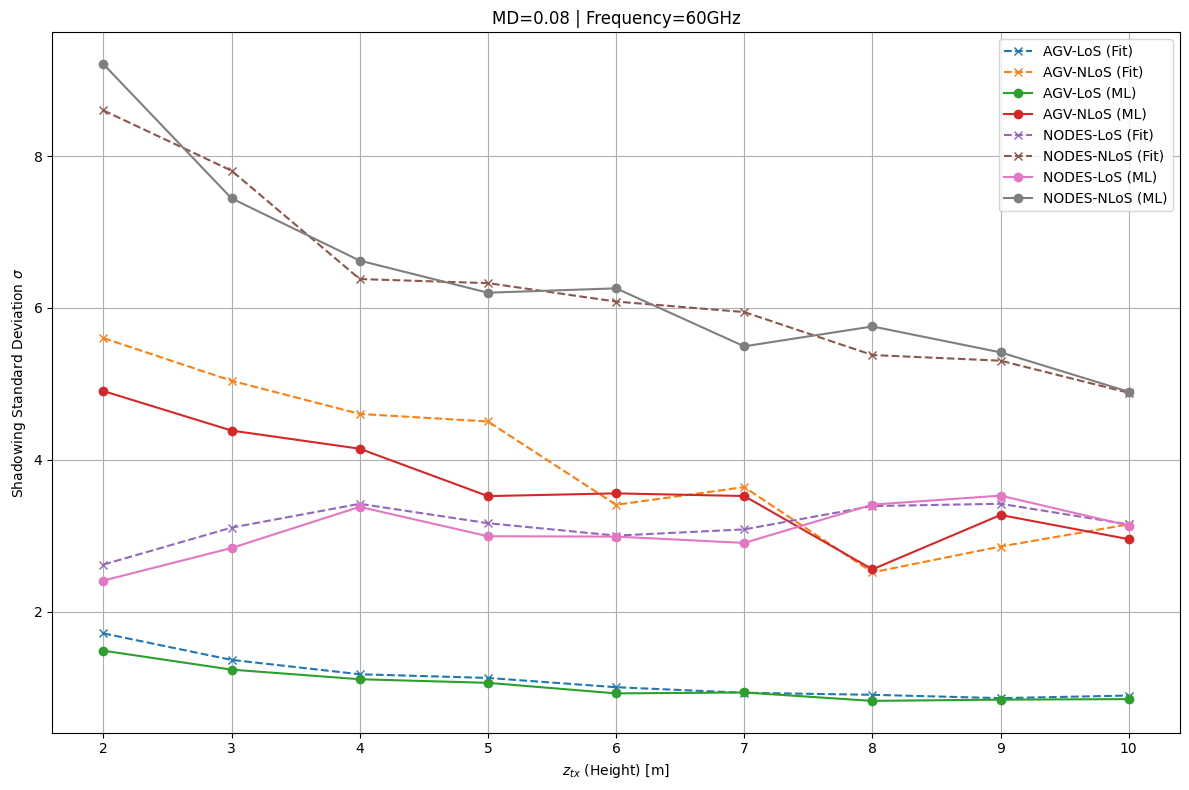

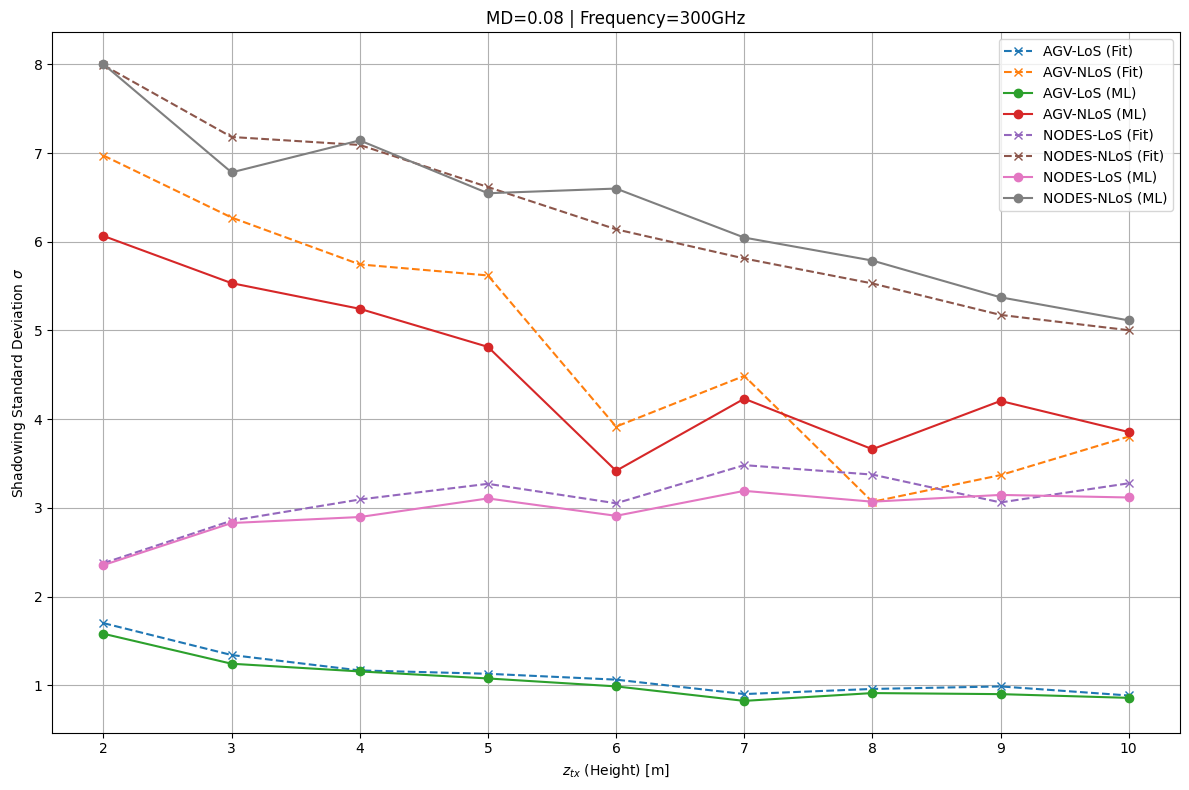

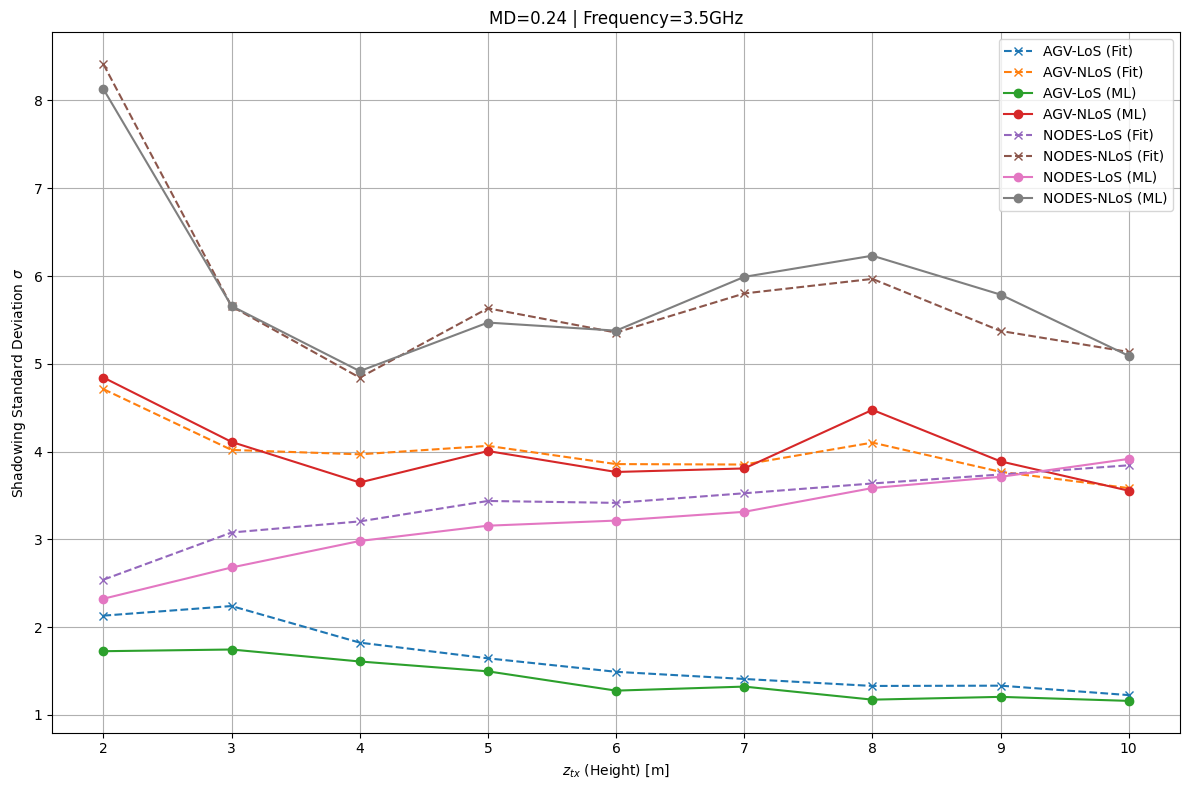

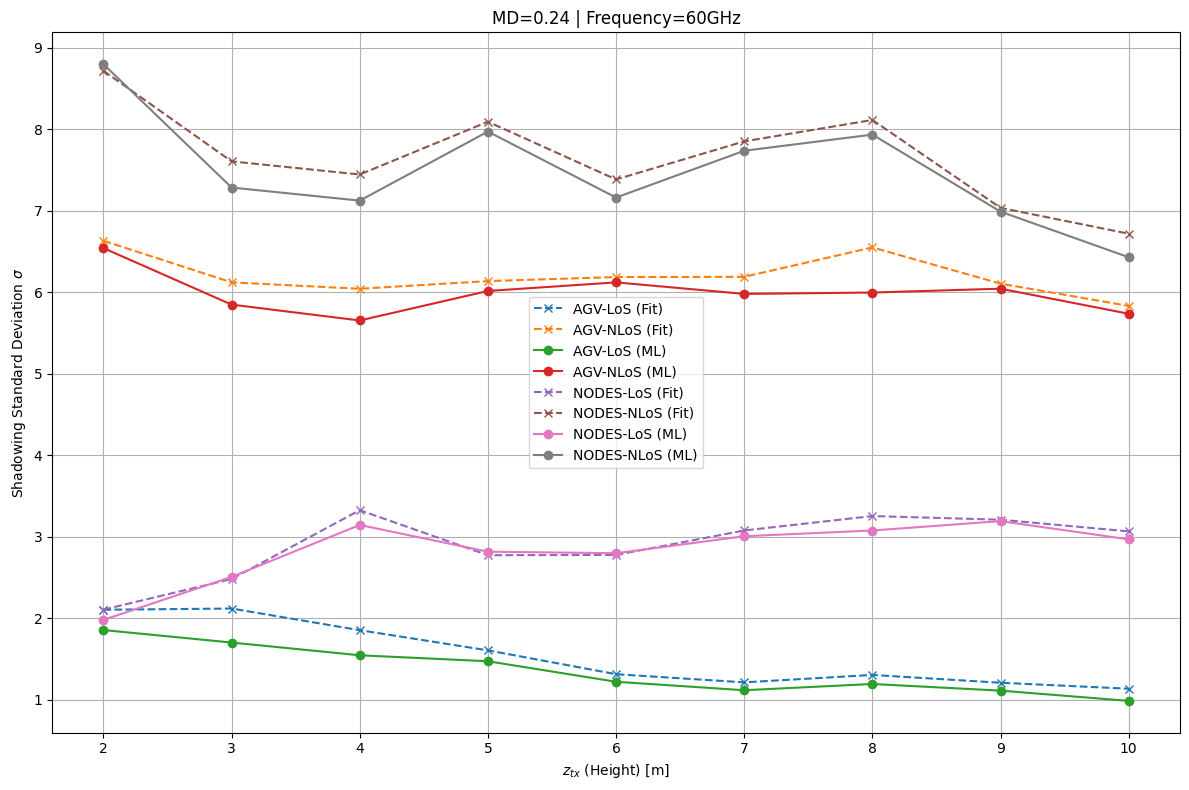

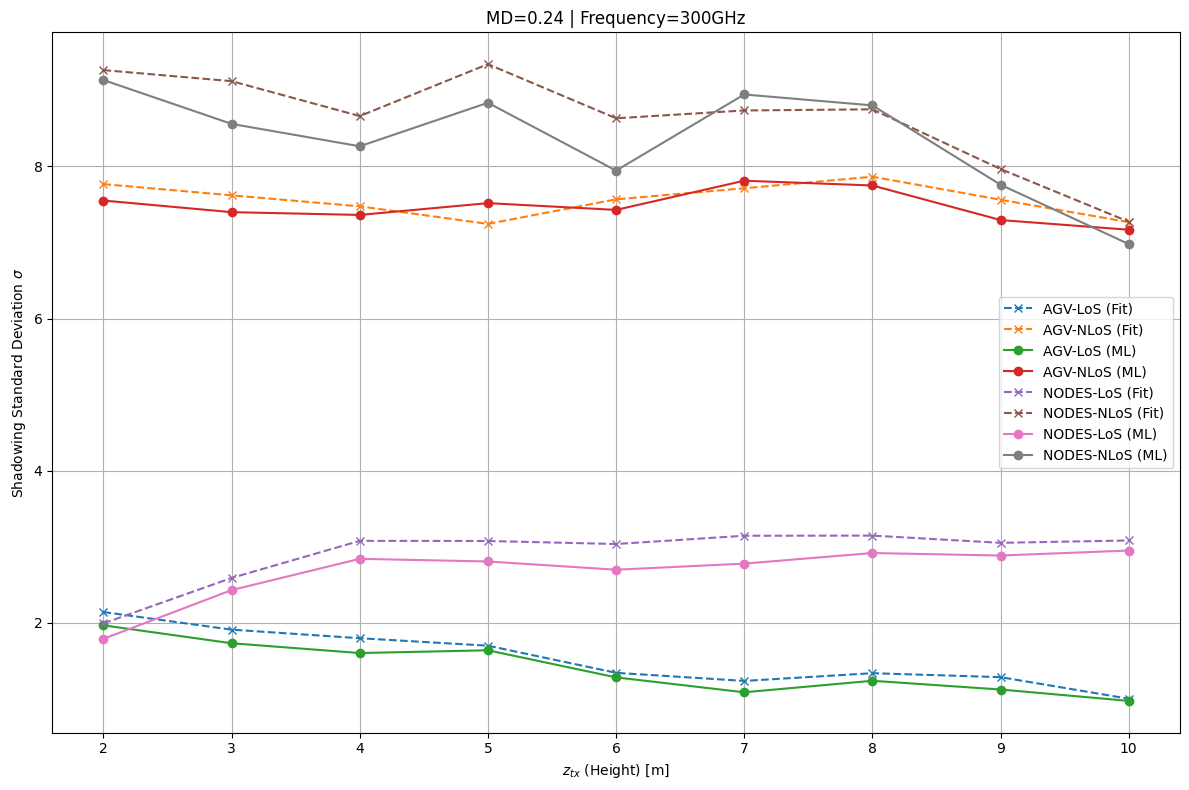

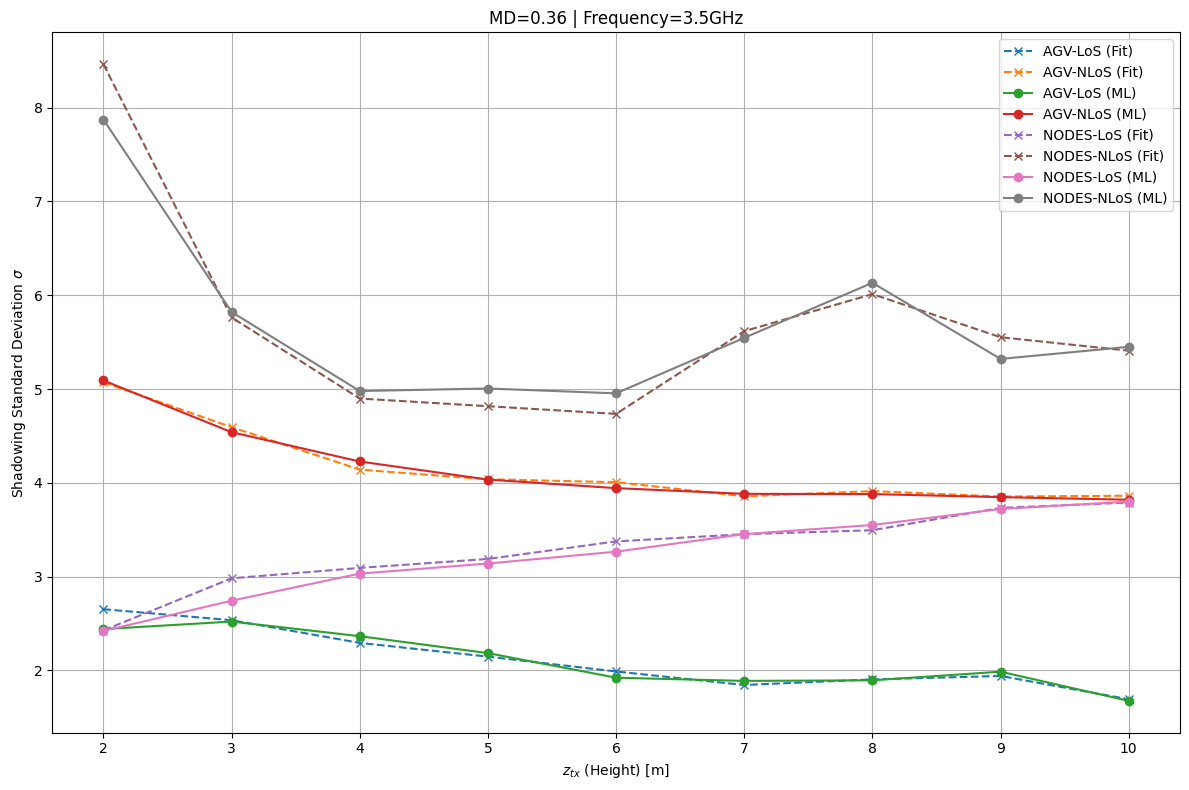

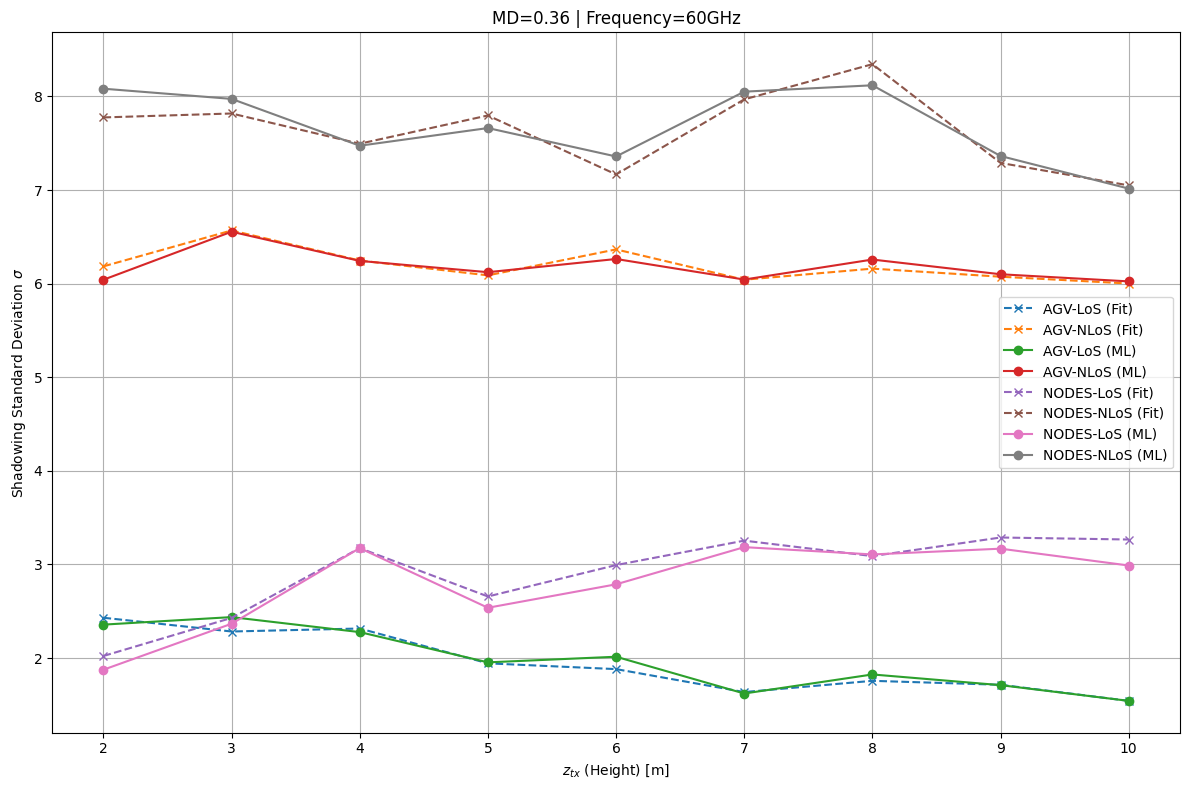

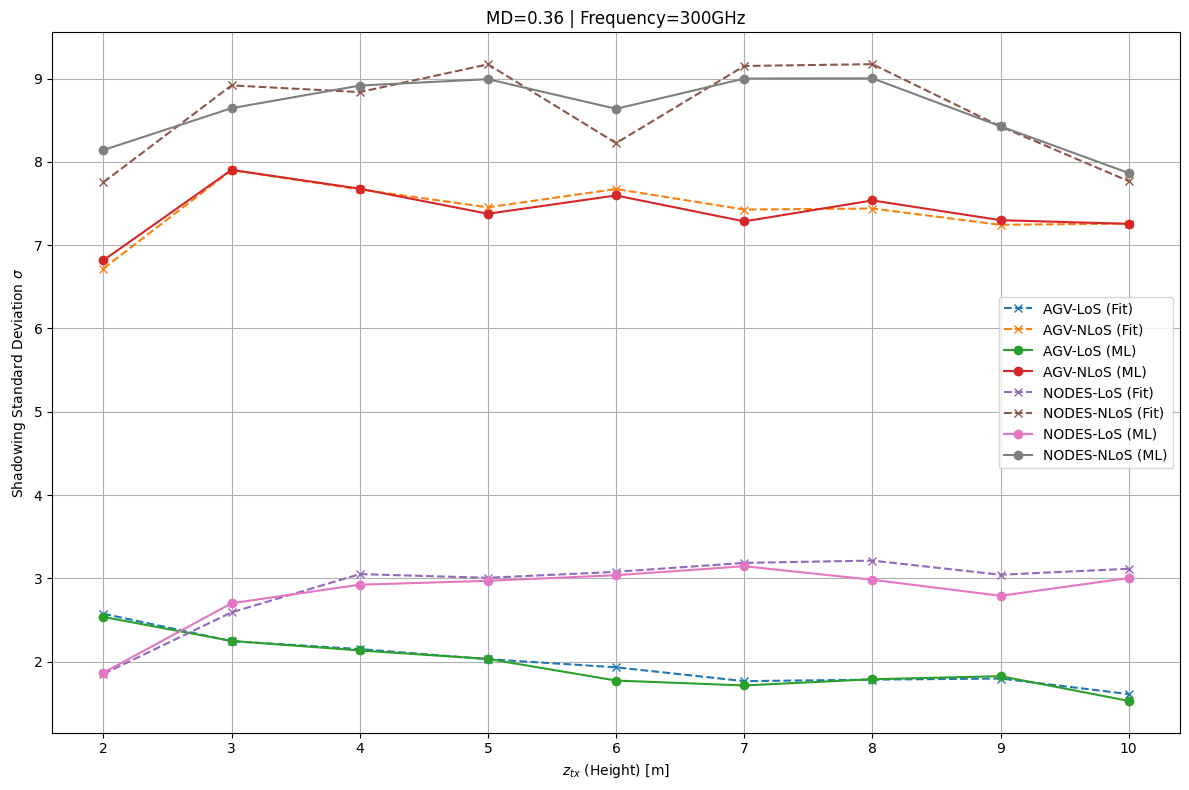

Analysis complete!


In [7]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm

dataset_path = "dataset"
subfolders = ["agv", "nodes"]

# Store raw data by subfolder, MD, frequency, height
raw_data = {sub: {} for sub in subfolders}

# Step 1: Collect all raw data first
print("Collecting raw data...")
for subfolder in subfolders:
    folder_path = os.path.join(dataset_path, subfolder)
    files = glob.glob(os.path.join(folder_path, "*.txt"))
    
    for file in tqdm(files):
        filename = os.path.basename(file)
        parts = filename.split("_")
        md = parts[3]
        freq = parts[5]
        h_tx = int(parts[8].split('.')[0])

        df = pd.read_csv(file)
        
        # Store data in our structure
        key = (md, freq, h_tx)
        if key not in raw_data[subfolder]:
            raw_data[subfolder][key] = df

# Step 2: Train Decision Tree classifiers for each combination
print("Training Decision Tree classifiers...")
ml_classifiers = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    for key, df in tqdm(raw_data[subfolder].items()):
        md, freq, h_tx = key
        
        # Prepare data for classification
        X = df[["distance", "PL"]]  # Features
        y = df["category"]          # Original labels
        
        # Train/Test Split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
        
        # Train Decision Tree model
        model = RandomForestClassifier()
        model.fit(X_train, y_train)
        
        # Store the trained model
        if md not in ml_classifiers[subfolder]:
            ml_classifiers[subfolder][md] = {}
        if freq not in ml_classifiers[subfolder][md]:
            ml_classifiers[subfolder][md][freq] = {}
        
        ml_classifiers[subfolder][md][freq][h_tx] = model

# Step 3: Calculate Path Loss Exponent for both original and ML-predicted labels
print("Calculating Path Loss Exponent...")
# Results structure: subfolder -> md -> freq -> {original/ml} -> link_label -> [(height, alpha)]
results = {sub: {} for sub in subfolders}

for subfolder in subfolders:
    count = 0
    for key, df in tqdm(raw_data[subfolder].items()):
        md, freq, h_tx = key

        # Get ML predictions for this dataset
        X = df[["distance", "PL"]]
        original_labels = df["category"]
        
        # Use the corresponding trained model to predict labels
        if (md in ml_classifiers[subfolder] and 
            freq in ml_classifiers[subfolder][md] and 
            h_tx in ml_classifiers[subfolder][md][freq]):
            
            classifier = ml_classifiers[subfolder][md][freq][h_tx]  # better naming
            ml_predicted_labels = classifier.predict(X)
        else:
            continue  # Skip if no model is available
        
        # Calculate wavelength and reference path loss
        f = float(freq[:-3]) * 1e9
        wavelength = 3e8 / f
        c = 20 * np.log10(4 * np.pi / wavelength)
        
        # Process both original and ML-predicted labels
        for label_type, labels in [("original", original_labels), ("ml", ml_predicted_labels)]:
            # Create a new dataframe with the labels
            df_with_labels = df.copy()
            df_with_labels["labels"] = labels

            # Process LoS and NLoS separately
            for link_value, link_label in [(1.0, 'LoS'), (0.0, 'NLoS')]:
                df_link = df_with_labels[df_with_labels["labels"] == link_value]
                
                if df_link.empty:
                    continue

                X_link = df_link[["distance"]]
                y_link = df_link["PL"]

                if len(X_link) < 10:  # Skip if too few samples
                    continue

                # Train/Test Split
                X_train, X_test, y_train, y_test = train_test_split(
                    X_link, y_link, test_size=0.2, random_state=420)

                # Take log10 of distances
                X_train_log = np.log10(X_train.values)
                X_test_log = np.log10(X_test.values)

                # Linear Regression on log10(d)
                regressor = LinearRegression()
                regressor.fit(X_train_log, y_train)

                # Predictions
                y_pred = regressor.predict(X_test_log)

                # Residuals
                residuals = (y_test - y_pred)/2

                # Standard deviation (sigma)
                std = np.std(residuals)  # not RMSE

                # Store results
                if md not in results[subfolder]:
                    results[subfolder][md] = {}
                if freq not in results[subfolder][md]:
                    results[subfolder][md][freq] = {}
                if label_type not in results[subfolder][md][freq]:
                    results[subfolder][md][freq][label_type] = {}
                if link_label not in results[subfolder][md][freq][label_type]:
                    results[subfolder][md][freq][label_type][link_label] = []

                results[subfolder][md][freq][label_type][link_label].append((h_tx, std))

# Step 4: Create 9 plots with both Fit and ML results
print("Creating plots...")
md_list = ['0.08', '0.24', '0.36']
freq_list = ['3.5GHz', '60GHz', '300GHz']

for md in md_list:
    for freq in freq_list:
        plt.figure(figsize=(12, 8))
        
        for subfolder in subfolders:
            if md not in results[subfolder] or freq not in results[subfolder][md]:
                continue
                
            # Plot original labels (Fit)
            if 'original' in results[subfolder][md][freq]:
                for link_label in ['LoS', 'NLoS']:
                    if link_label in results[subfolder][md][freq]['original']:
                        values = results[subfolder][md][freq]['original'][link_label]
                        values.sort(key=lambda x: x[0])
                        heights, std = zip(*values)
                        plt.plot(heights, std, marker='x', linestyle='--', 
                                label=f"{subfolder.upper()}-{link_label} (Fit)")
            
            # Plot ML-predicted labels
            if 'ml' in results[subfolder][md][freq]:
                for link_label in ['LoS', 'NLoS']:
                    if link_label in results[subfolder][md][freq]['ml']:
                        values = results[subfolder][md][freq]['ml'][link_label]
                        values.sort(key=lambda x: x[0])
                        heights, std = zip(*values)
                        plt.plot(heights, std, marker='o', linestyle='-', 
                                label=f"{subfolder.upper()}-{link_label} (ML)")
        
        plt.xlabel("$z_{tx}$ (Height) [m]")
        plt.ylabel("Shadowing Standard Deviation $\\sigma$")
        plt.title(f"MD={md} | Frequency={freq}")
        plt.legend()
        plt.grid()
        plt.tight_layout()
        # plt.savefig(f"PL_exponent_MD{md}_{freq}.png")
        plt.show()

print("Analysis complete!")

In [8]:
sigma_ranges = {}

for md in md_list:
    for freq in freq_list:
        for subfolder in subfolders:  # AGV/NODE (AGV = AGV, NODE = MN)
            if md not in results[subfolder] or freq not in results[subfolder][md]:
                continue

            for label_type in ['original', 'ml']:  # If you want only "original", you can fix it
                if label_type not in results[subfolder][md][freq]:
                    continue

                for link_label in ['LoS', 'NLoS']:
                    if link_label not in results[subfolder][md][freq][label_type]:
                        continue

                    values = results[subfolder][md][freq][label_type][link_label]
                    if not values:
                        continue
                    
                    heights, stds = zip(*values)
                    min_std = min(stds)
                    max_std = max(stds)
                    # Key: (MD, frequency, node_type, link_type, label_type)
                    key = (md, freq, subfolder.upper(), link_label, label_type)
                    sigma_ranges[key] = (min_std, max_std)

In [9]:
import pandas as pd

# First prepare a list of all rows
table_rows = []

# Only consider 'original' label type
for (md, freq, node, link, label_type), (min_std, max_std) in sigma_ranges.items():
    if label_type != 'original':
        continue
    
    table_rows.append({
        "f": freq,
        "MD": md,
        "Node": node,
        "Link": link,
        "Sigma Range": f"[{min_std:.1f}, {max_std:.1f}]"
    })

# Create a DataFrame
df = pd.DataFrame(table_rows)

# Pivot it into your desired table
pivot_table = pd.pivot_table(df, 
                             values="Sigma Range", 
                             index=["f", "MD"], 
                             columns=["Node", "Link"], 
                             aggfunc=lambda x: x)

# Order columns to match AGV first, MN second
pivot_table = pivot_table[[
    ("AGV", "LoS"), ("AGV", "NLoS"),
    ("NODES", "LoS"), ("NODES", "NLoS")
]]

# Fix column names
pivot_table.columns = ['σ_LoS_AGV', 'σ_NLoS_AGV', 'σ_LoS_MN', 'σ_NLoS_MN']

# Reset index for pretty printing
pivot_table = pivot_table.reset_index()

# Show final table
print(pivot_table.to_string(index=False))

# Optionally save to CSV
pivot_table.to_csv("sigma_table.csv", index=False)

     f   MD  σ_LoS_AGV σ_NLoS_AGV   σ_LoS_MN  σ_NLoS_MN
3.5GHz 0.08 [0.9, 1.7] [2.0, 4.1] [2.7, 4.2] [5.0, 9.0]
3.5GHz 0.24 [1.2, 2.2] [3.6, 4.7] [2.5, 3.8] [4.8, 8.4]
3.5GHz 0.36 [1.7, 2.7] [3.9, 5.1] [2.4, 3.8] [4.7, 8.5]
300GHz 0.08 [0.9, 1.7] [3.1, 7.0] [2.4, 3.5] [5.0, 8.0]
300GHz 0.24 [1.0, 2.1] [7.2, 7.9] [2.0, 3.1] [7.3, 9.3]
300GHz 0.36 [1.6, 2.6] [6.7, 7.9] [1.9, 3.2] [7.8, 9.2]
 60GHz 0.08 [0.9, 1.7] [2.5, 5.6] [2.6, 3.4] [4.9, 8.6]
 60GHz 0.24 [1.1, 2.1] [5.8, 6.6] [2.1, 3.3] [6.7, 8.7]
 60GHz 0.36 [1.5, 2.4] [6.0, 6.6] [2.0, 3.3] [7.1, 8.3]


In [10]:
pd.read_csv('sigma_table.csv')

,f,MD,σ_LoS_AGV,σ_NLoS_AGV,σ_LoS_MN,σ_NLoS_MN
0,3.5GHz,0.08,"[0.9, 1.7]","[2.0, 4.1]","[2.7, 4.2]","[5.0, 9.0]"
1,3.5GHz,0.24,"[1.2, 2.2]","[3.6, 4.7]","[2.5, 3.8]","[4.8, 8.4]"
2,3.5GHz,0.36,"[1.7, 2.7]","[3.9, 5.1]","[2.4, 3.8]","[4.7, 8.5]"
3,300GHz,0.08,"[0.9, 1.7]","[3.1, 7.0]","[2.4, 3.5]","[5.0, 8.0]"
4,300GHz,0.24,"[1.0, 2.1]","[7.2, 7.9]","[2.0, 3.1]","[7.3, 9.3]"
5,300GHz,0.36,"[1.6, 2.6]","[6.7, 7.9]","[1.9, 3.2]","[7.8, 9.2]"
6,60GHz,0.08,"[0.9, 1.7]","[2.5, 5.6]","[2.6, 3.4]","[4.9, 8.6]"
7,60GHz,0.24,"[1.1, 2.1]","[5.8, 6.6]","[2.1, 3.3]","[6.7, 8.7]"
8,60GHz,0.36,"[1.5, 2.4]","[6.0, 6.6]","[2.0, 3.3]","[7.1, 8.3]"
